In [20]:
from keras.datasets import mnist                        # 導入 MNIST 資料集
from keras import models
from keras import layers
from keras.utils import to_categorical

# 載入 MNIST 資料集
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 建立神經網絡模型
network = models.Sequential()
network.add(layers.Dense(1000, activation='relu', input_shape=(28 * 28,)))  # 添加第一層：有 1000 個神經元，啟動函數為 ReLU，輸入形狀為 28*28
network.add(layers.Dense(10, activation='softmax'))  # 添加第二層：有 10 個神經元，啟動函數為 softmax

# 編譯模型
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 正規化資料
X_train = X_train.reshape((60000, 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((10000, 28 * 28)).astype('float32') / 255

# 對標籤進行 one-hot 編碼
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 訓練模型
history=network.fit(X_train, y_train, epochs=5, batch_size=128, validation_data =(X_test, y_test))



Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8746 - loss: 0.4133 - val_accuracy: 0.9642 - val_loss: 0.1111
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9703 - loss: 0.0982 - val_accuracy: 0.9725 - val_loss: 0.0826
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9820 - loss: 0.0604 - val_accuracy: 0.9770 - val_loss: 0.0709
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9875 - loss: 0.0432 - val_accuracy: 0.9806 - val_loss: 0.0601
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9915 - loss: 0.0295 - val_accuracy: 0.9813 - val_loss: 0.0613


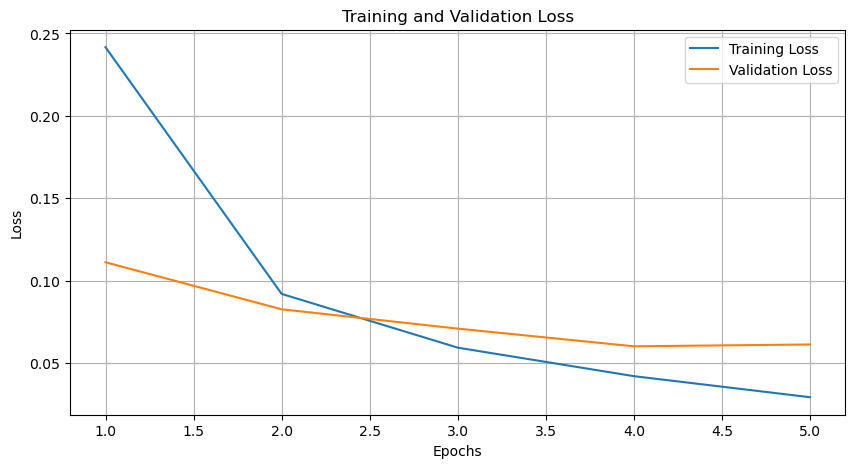

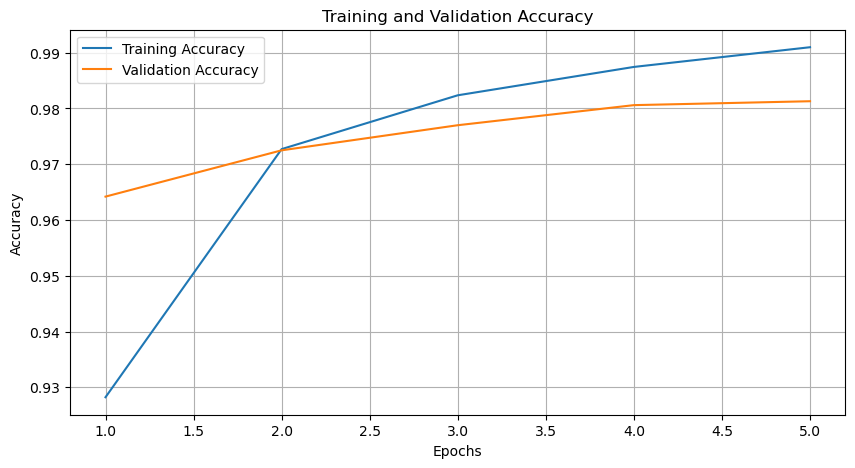

In [23]:
import matplotlib.pyplot as plt

# 獲取訓練過程中的損失和準確率
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# 繪製損失曲線
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# 繪製準確率曲線
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
! pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [27]:
from keras.datasets import boston_housing 
from keras import models
from keras import layers

# 載入波士頓房屋資料集
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data() 

# 計算訓練資料的均值並標準化
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

# 對測試資料進行相同的標準化處理
test_data -= mean
test_data /= std

# 建立模型
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# 建立模型
model = build_model()

# 訓練模型
history=model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=1, validation_data =(test_data, test_targets))




Epoch 1/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 515.2012 - mae: 20.9283 - val_loss: 447.3204 - val_mae: 18.4466
Epoch 2/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 316.6193 - mae: 15.6909 - val_loss: 244.0011 - val_mae: 12.9855
Epoch 3/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 180.6445 - mae: 11.1742 - val_loss: 102.1308 - val_mae: 7.9126
Epoch 4/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 76.2851 - mae: 6.6404 - val_loss: 59.3241 - val_mae: 6.0768
Epoch 5/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48.6028 - mae: 5.3224 - val_loss: 39.3864 - val_mae: 4.9540
Epoch 6/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37.6616 - mae: 4.4470 - val_loss: 31.9959 - val_mae: 4.3841
Epoch 7/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.2029 - mae: 3.7809 - val_loss: 28.9801 - val_mae: 3.9355
Epoch 8/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.1796 - mae: 3.2584 - val_loss: 29.6513 - val_mae: 3.8518
Epoch 9/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

Epoch 55/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2867 - mae: 1.8160 - val_loss: 27.6828 - val_mae: 2.6132
Epoch 56/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4126 - mae: 1.7115 - val_loss: 30.6118 - val_mae: 2.7952
Epoch 57/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6822 - mae: 1.8365 - val_loss: 26.9070 - val_mae: 2.8660
Epoch 58/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1152 - mae: 1.8401 - val_loss: 25.9959 - val_mae: 2.6566
Epoch 59/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3174 - mae: 1.7548 - val_loss: 26.7476 - val_mae: 2.5348
Epoch 60/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2354 - mae: 1.8131 - val_loss: 27.1095 - val_mae: 2.6089
Epoch 61/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1422 - mae: 1.7282 - val_loss: 28.5731 - val_mae: 2.9706
Epoch 62/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7776 - mae: 1.6677 - val_loss: 30.3913 - val_mae: 2.7921
Epoch 63/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - los

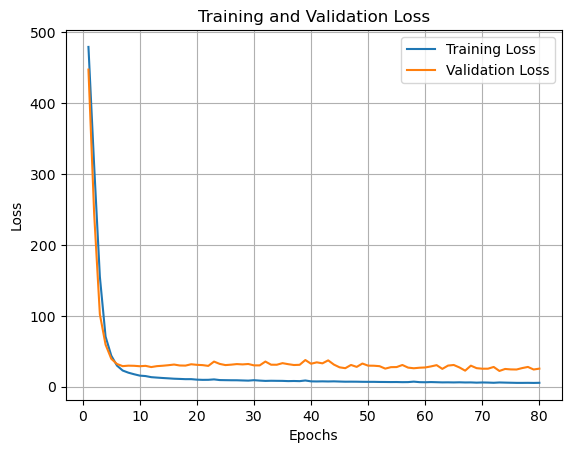

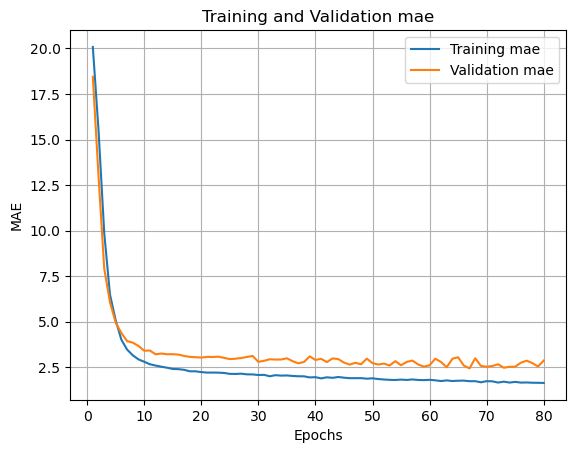

In [30]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation accuracy
train_acc = history.history['mae']
val_acc = history.history['val_mae']

plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training mae')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation mae')
plt.legend()
plt.grid(True)
plt.show()